In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from CASutils import filter_utils as filt
from CASutils import readdata_utils as read
from CASutils import calendar_utils as cal

from scipy import stats

importlib.reload(filt)
importlib.reload(read)
importlib.reload(cal)

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"
datapath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/3cities/SCAM_CLMINIT_60days/"

In [3]:
def deseasonalize(dat):
    datseas = dat.groupby('time.dayofyear').mean('time')
    dat4harm = filt.calc_season_nharm(datseas,4,dimtime=1)
    datanoms = dat.groupby('time.dayofyear') - dat4harm
    datdjfanoms = cal.group_season_daily(datanoms,'DJF')
    datmean = datdjfanoms.mean('day')
    datdjfanoms = datdjfanoms - datmean
    return datdjfanoms

In [4]:
#SCAM_CLM5
dat1 = xr.open_dataset(datapath+"/TREFHT_SCAM_CLM5_CLM5F_01.nc")
dat1 = dat1.sel(time=slice("1979-01-01", "2014-12-31"))
dat1 = dat1.trefht
dat1deseas = deseasonalize(dat1)

dat2 = xr.open_dataset(datapath+"/TREFHT_SCAM_CLM5_CLM5F_02.nc")
dat2 = dat2.sel(time=slice("1979-01-01", "2014-12-31"))
dat2 = dat2.trefht
dat2deseas = deseasonalize(dat2)

nyears = dat1deseas.year.size + dat2deseas.year.size

scam_clm5 = np.zeros([nyears, dat1deseas.day.size, dat1deseas.city.size])
scam_clm5[0:dat1deseas.year.size,:,:] = dat1deseas
scam_clm5[dat1deseas.year.size:nyears,:,:]=dat2deseas

nyears=35.0
nyears=35.0


In [5]:
#SCAM_SNOWD_CLM5F
dat1 = xr.open_dataset(datapath+"/TREFHT_SCAM_SNOWD_CLM5F_01.nc")
dat1 = dat1.sel(time=slice("1979-01-01", "2014-12-31"))
dat1 = dat1.trefht
dat1deseas = deseasonalize(dat1)

dat2 = xr.open_dataset(datapath+"/TREFHT_SCAM_SNOWD_CLM5F_02.nc")
dat2 = dat2.sel(time=slice("1979-01-01", "2014-12-31"))
dat2 = dat2.trefht
dat2deseas = deseasonalize(dat2)

nyears = dat1deseas.year.size + dat2deseas.year.size

scam_snowd = np.zeros([nyears, dat1deseas.day.size, dat1deseas.city.size])
scam_snowd[0:dat1deseas.year.size,:,:] = dat1deseas
scam_snowd[dat1deseas.year.size:nyears,:,:]=dat2deseas

nyears=35.0
nyears=35.0


In [6]:
#SCAM_SNOWDa (only density part, not densification)
dat1 = xr.open_dataset(datapath+"/TREFHT_SCAM_SNOWDa_CLM5F_01.nc")
dat1 = dat1.sel(time=slice("1979-01-01", "2014-12-31"))
dat1 = dat1.trefht
dat1deseas = deseasonalize(dat1)

dat2 = xr.open_dataset(datapath+"/TREFHT_SCAM_SNOWDa_CLM5F_02.nc")
dat2 = dat2.sel(time=slice("1979-01-01", "2014-12-31"))
dat2 = dat2.trefht
dat2deseas = deseasonalize(dat2)

nyears = dat1deseas.year.size + dat2deseas.year.size

scam_snowda = np.zeros([nyears, dat1deseas.day.size, dat1deseas.city.size])
scam_snowda[0:dat1deseas.year.size,:,:] = dat1deseas
scam_snowda[dat1deseas.year.size:nyears,:,:]=dat2deseas

nyears=35.0
nyears=35.0


In [7]:
bins = np.arange(-35.5,36.5,2)
scamclm5pdf = np.zeros([bins.size,3])
scamsnowdpdf = np.zeros([bins.size,3])
scamsnowdapdf = np.zeros([bins.size,3])
for icity in np.arange(0,dat1.city.size,1):
    dat = scam_clm5[:,:,icity].flatten()
    kernel = stats.gaussian_kde(dat)
    scamclm5pdf[:,icity] = kernel(bins)*100.
    
    dat = scam_snowd[:,:,icity].flatten()
    kernel = stats.gaussian_kde(dat)
    scamsnowdpdf[:,icity] = kernel(bins)*100.
    
    dat = scam_snowda[:,:,icity].flatten()
    kernel = stats.gaussian_kde(dat)
    scamsnowdapdf[:,icity] = kernel(bins)*100.

In [8]:
def plotlogpdf(fig,titlestr,x1,x2,y1,y2):
    ax = fig.add_axes([x1,y1,(x2-x1),(y2-y1)])
    
    ax.set_ylim(np.log10(0.01),np.log10(15))
    ax.set_yticks([np.log10(0.01),np.log10(0.03),np.log10(0.1),np.log10(0.3),np.log10(1),np.log10(3),np.log10(10)])
    ax.set_yticklabels(['0.01','0.03','0.1','0.3','1','3','10'], fontsize=12)
    ax.set_ylabel('Probability (%)', fontsize=12)
    ax.set_xlim([-35,35])
    ax.set_xticks([-30,-20,-10,0,10,20,30])
    ax.set_xticklabels(['-30','-20','-10','0','10','20','30'], fontsize=12)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    ax.set_ylabel('Probability (%)', fontsize=14)
    ax.set_title(titlestr,fontsize=16)
    
    return ax

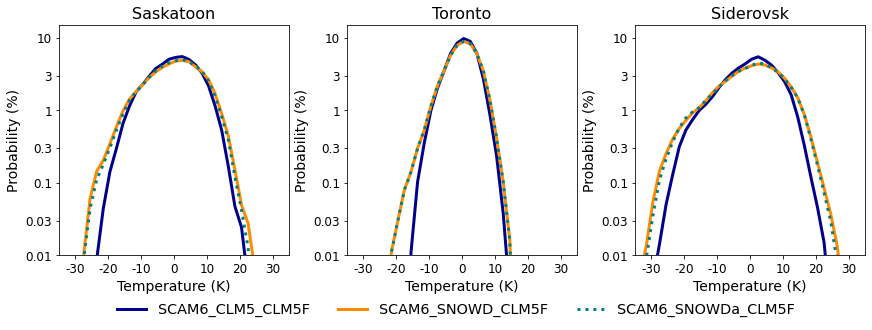

In [9]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16,16))

ax1 = plotlogpdf(fig,'Saskatoon',0.1,0.3,0.7,0.9)
ax1.plot(bins,np.log10(scamclm5pdf[:,0]),color='darkblue', linewidth=3)
ax1.plot(bins,np.log10(scamsnowdpdf[:,0]), color='darkorange', linewidth=3)
ax1.plot(bins,np.log10(scamsnowdapdf[:,0]), color='teal', linewidth=3, linestyle='dotted')

ax2 = plotlogpdf(fig,'Toronto',0.35,0.55,0.7,0.9)
ax2.plot(bins,np.log10(scamclm5pdf[:,1]),color='darkblue', linewidth=3)
ax2.plot(bins,np.log10(scamsnowdpdf[:,1]), color='darkorange', linewidth=3)
ax2.plot(bins,np.log10(scamsnowdapdf[:,1]), color='teal', linewidth=3, linestyle='dotted')

ax3 = plotlogpdf(fig,'Siderovsk',0.6,0.8,0.7,0.9)
ax3.plot(bins,np.log10(scamclm5pdf[:,2]),color='darkblue', linewidth=3)
ax3.plot(bins,np.log10(scamsnowdpdf[:,2]), color='darkorange', linewidth=3)
ax3.plot(bins,np.log10(scamsnowdapdf[:,2]), color='teal', linewidth=3, linestyle='dotted')

legendparts = [Line2D([0],[0],color='darkblue',linewidth=3),
              Line2D([0],[0],color='darkorange',linewidth=3),
              Line2D([0],[0],color='teal',linewidth=3,linestyle='dotted')]

legendlabels=['SCAM6_CLM5_CLM5F','SCAM6_SNOWD_CLM5F','SCAM6_SNOWDa_CLM5F']

fig.legend(legendparts, legendlabels, bbox_to_anchor = (0.75,0.67), ncol=3, frameon=False, fontsize='x-large')


fig.savefig(plotpath+"figS4.pdf", facecolor='white', bbox_inches='tight')